## Exemple camera whit Alpaca

In [1]:
from alpaca import Camera
from ciboulette.indiclient.camera import ATIKCam383L
from ciboulette.base import ciboulette
from ciboulette.utils import exposure

- Ciboulette class, camera class and exposure class initialised, Alpaca server started

In [2]:
cbl = ciboulette.Ciboulette()
cbl.serverport = {'SVR': '192.168.1.18', 'PORT': 11111} 
ccd = Camera(cbl.serverport,cbl.device)
exp = exposure.Exposure()
exp.exp_time = 2
exp.now2label

- Camera configured Atik Titan

In [3]:
cbl.atiktitan
cbl.table.pprint(max_width = 255)

API        SERVER       DEVICE FOCAL DIAM SITE_LAT SITE_LONG SITE_ELEV  INSTRUME  NAXIS1 NAXIS2 BINXY PIXELXY FILTER     NAME     OBSERVER DATASET     ARCHIVES      RA DEC  OBJECT
---- ------------------ ------ ----- ---- -------- --------- --------- ---------- ------ ------ ----- ------- ------ ------------ -------- ------- ---------------- --- ---- ------
2000 192.168.1.18:11111      0  85.0   60  49.5961    359.65       100 Atik Titan    659    494     1     7.4      L CIBOULETTE-A     CAM1 dataset dataset/archives 0.0 90.0   INIT


- Exposure configured

In [4]:
cbl.exposure = exp

In [5]:
cbl.exposure

(2, '20210409233518', 'Intensity')

- Read the CCD with the Alpaca server and show

In [6]:
cbl.camera(ccd)

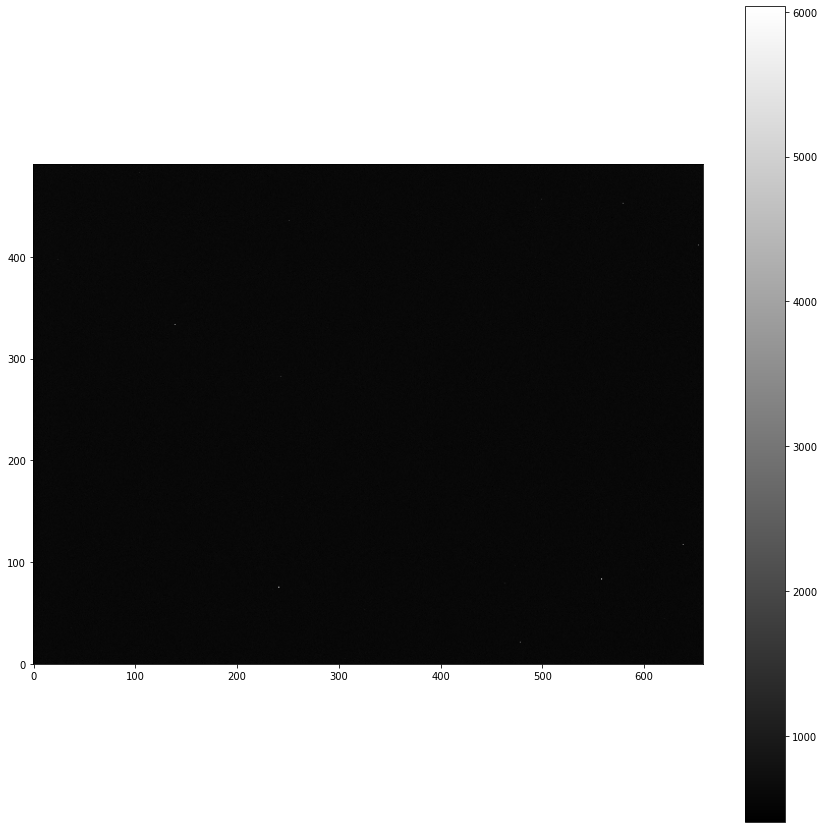

In [9]:
import matplotlib.pyplot as plt
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

expose,frameid,datatype = cbl.exposure
image_file = get_pkg_data_filename('dataset/CAM1_INIT_' + str(frameid) + '.fits')
image_data = fits.getdata(image_file, ext=0)
plt.figure(figsize=(15,15))
plt.imshow(image_data, origin='lower', cmap='gray')
plt.colorbar()
plt.show()

- Show fits header

In [10]:
fits.getheader(image_file)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  658                                                  
NAXIS2  =                  492                                                  
PIXSIZE1=    7.400000095367432 / [um] Pixel Size X, binned                      
PIXSIZE2=    7.400000095367432 / [um] Pixel Size Y, binned                      
XBINNING=                    1 / Binning factor X                               
YBINNING=                    1 / Binning factor Y                               
EXPTIME =                    2 / [s] Total Exposure Time                        
OBJECT  = 'INIT    '           / Observed object name                           
OBSERVER= 'CAM1    '           / Observed name                                  
TELESCOP= 'CIBOULETTE-A'    

- With ASI 120 Mini

In [3]:
cbl_2 = ciboulette.Ciboulette()
cbl_2.serverport = {'SVR': '192.168.1.18', 'PORT': 11111}
cbl_2.device = 1
ccd_ASI120Mini = Camera(cbl_2.serverport,cbl_2.device)
cbl_2.observer_name = 'CAM2'
cbl_2.asi120
exp = exposure.Exposure()
cbl_2.table.pprint(max_width = 255)

API        SERVER       DEVICE FOCAL DIAM SITE_LAT SITE_LONG SITE_ELEV INSTRUME NAXIS1 NAXIS2 BINXY PIXELXY FILTER     NAME     OBSERVER DATASET     ARCHIVES      RA DEC  OBJECT
---- ------------------ ------ ----- ---- -------- --------- --------- -------- ------ ------ ----- ------- ------ ------------ -------- ------- ---------------- --- ---- ------
2000 192.168.1.18:11111      1  85.0   60  49.5961    359.65       100  ASI 120   1280    960     1    3.75      L CIBOULETTE-A     CAM2 dataset dataset/archives 0.0 90.0   INIT


In [4]:
exp.exp_time = 5
exp.now2label
cbl_2.exposure = exp

- Read the CCD with the Alpaca server and show

In [5]:
cbl_2.camera(ccd_ASI120Mini)

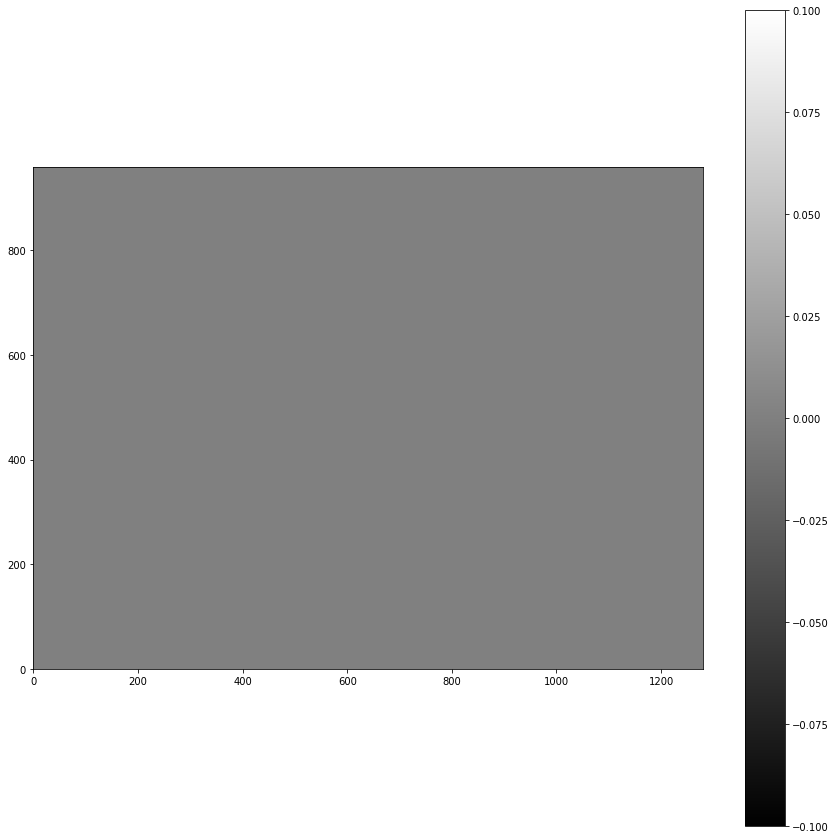

In [6]:
import matplotlib.pyplot as plt
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
expose,frameid,datatype = cbl_2.exposure

image_file = get_pkg_data_filename('dataset/CAM2_INIT_' + str(frameid) + '.fits')
image_data = fits.getdata(image_file, ext=0)
plt.figure(figsize=(15,15))
plt.imshow(image_data, origin='lower', cmap='gray')
plt.colorbar()
plt.show()

- Show fits header

In [7]:
fits.getheader(image_file)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1280                                                  
NAXIS2  =                  960                                                  
PIXSIZE1=                 3.75 / [um] Pixel Size X, binned                      
PIXSIZE2=                 3.75 / [um] Pixel Size Y, binned                      
XBINNING=                    1 / Binning factor X                               
YBINNING=                    1 / Binning factor Y                               
EXPTIME =                    5 / [s] Total Exposure Time                        
OBJECT  = 'INIT    '           / Observed object name                           
OBSERVER= 'CAM2    '           / Observed name                                  
TELESCOP= 'CIBOULETTE-A'    

## Exemple camera whit IndiClient

In [2]:
cbl_indi = ciboulette.Ciboulette()
cbl_indi.serverport = {'SVR': '192.168.1.30', 'PORT': 7624} 
cbl_indi.observer_name = 'CAM3'
cbl_indi.atik383L
cbl_indi.telescope_name = 'CIBOULETTE-B'
ccd_ATIK383L = ATIKCam383L(cbl_indi.server,cbl_indi.port)
exp = exposure.Exposure()
cbl_indi.table.pprint(max_width = 255)

API        SERVER      DEVICE FOCAL DIAM SITE_LAT SITE_LONG SITE_ELEV  INSTRUME  NAXIS1 NAXIS2 BINXY PIXELXY FILTER     NAME     OBSERVER DATASET     ARCHIVES      RA DEC  OBJECT
---- ----------------- ------ ----- ---- -------- --------- --------- ---------- ------ ------ ----- ------- ------ ------------ -------- ------- ---------------- --- ---- ------
2000 192.168.1.30:7624      0  85.0   60  49.5961    359.65       100 Atik 383L+   3326   2504     1     5.4      L CIBOULETTE-B     CAM3 dataset dataset/archives 0.0 90.0   INIT


In [3]:
exp.exp_time = 5
exp.now2label
cbl_indi.exposure = exp

- Client transfer mode

In [4]:
ccd_ATIK383L.client

<newSwitchVector device="Atik 383L" name="UPLOAD_MODE"> <oneSwitch name="UPLOAD_CLIENT"> On</oneSwitch> <oneSwitch name="UPLOAD_LOCAL"> Off</oneSwitch> <oneSwitch name="UPLOAD_BOTH"> Off</oneSwitch> </newSwitchVector> 


- Cooling start and cooling check

In [5]:
ccd_ATIK383L.temperature = -20

<newNumberVector device="Atik 383L" name="CCD_TEMPERATURE"> <oneNumber name="CCD_TEMPERATURE_VALUE"> -20</oneNumber> </newNumberVector> 


In [5]:
ccd_ATIK383L.temperature,ccd_ATIK383L.cooling_power

(-20.02, 63.52941176470588)

In [7]:
cbl_indi.camera(ccd_ATIK383L)

<newSwitchVector device="Atik 383L" name="CCD_FRAME_TYPE"> <oneSwitch name="FRAME_LIGHT"> On</oneSwitch> <oneSwitch name="FRAME_BIAS"> Off</oneSwitch> <oneSwitch name="FRAME_DARK"> Off</oneSwitch> <oneSwitch name="FRAME_FLAT"> Off</oneSwitch> </newSwitchVector> 
<newNumberVector device="Atik 383L" name="CCD_EXPOSURE"> <oneNumber name="CCD_EXPOSURE_VALUE"> 5</oneNumber> </newNumberVector> 


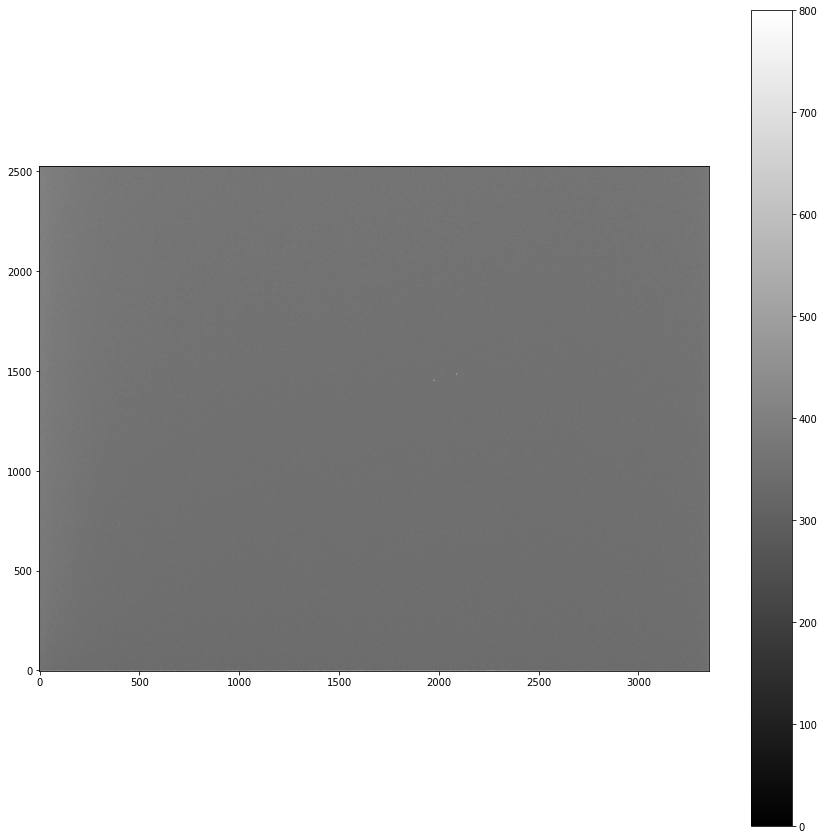

In [8]:
import matplotlib.pyplot as plt
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
expose,frameid,datatype = cbl_indi.exposure

image_file = get_pkg_data_filename('dataset/CAM3_INIT_' + str(frameid) + '.fits')
image_data = fits.getdata(image_file, ext=0)
plt.figure(figsize=(15,15))
plt.imshow(image_data, origin='lower', cmap='gray',vmin = 0, vmax = 800)
plt.colorbar()
plt.show()

In [9]:
fits.getheader(image_file)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3354                                                  
NAXIS2  =                 2529                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ROWORDER= 'TOP-DOWN'           / Row Order                                      
INSTRUME= 'Atik 383L+'         / CCD Name                                       
TELESCOP= 'CIBOULETTE-B'       / Telescope name                                 
OBSERVER= 'CAM3    '           / Observer name                                  
OBJECT  = 'INIT    '           / Object name                                    
EXPTIME =                   